## Final Course Project Overview

### The Situation

You and your business partner were recently approached by another local business owner who is interested in purchasing your Movies Rental Business. He primarily owns restaurant and bars, so he has lots of questions for you about your business and the rental business in general. His offer seems very generous, so you are going to entertain his questions.

### The Objective

Leverage your SQL skills to extract and analyze data from various tables in the Movies Database to answer you potential Acquirer’s questions. Each question will require you to write a multi-table SQL query, joining at least two tables.

The project database can be accessed here (https://github.com/oladeeayo/Final-Project-SQL/blob/main/project-db.db) or you can view the project files here (https://drive.google.com/drive/folders/13coOaxOPzEe5aVsNGDcieCCvMQy0wFOj)

### Project Schema Diagram

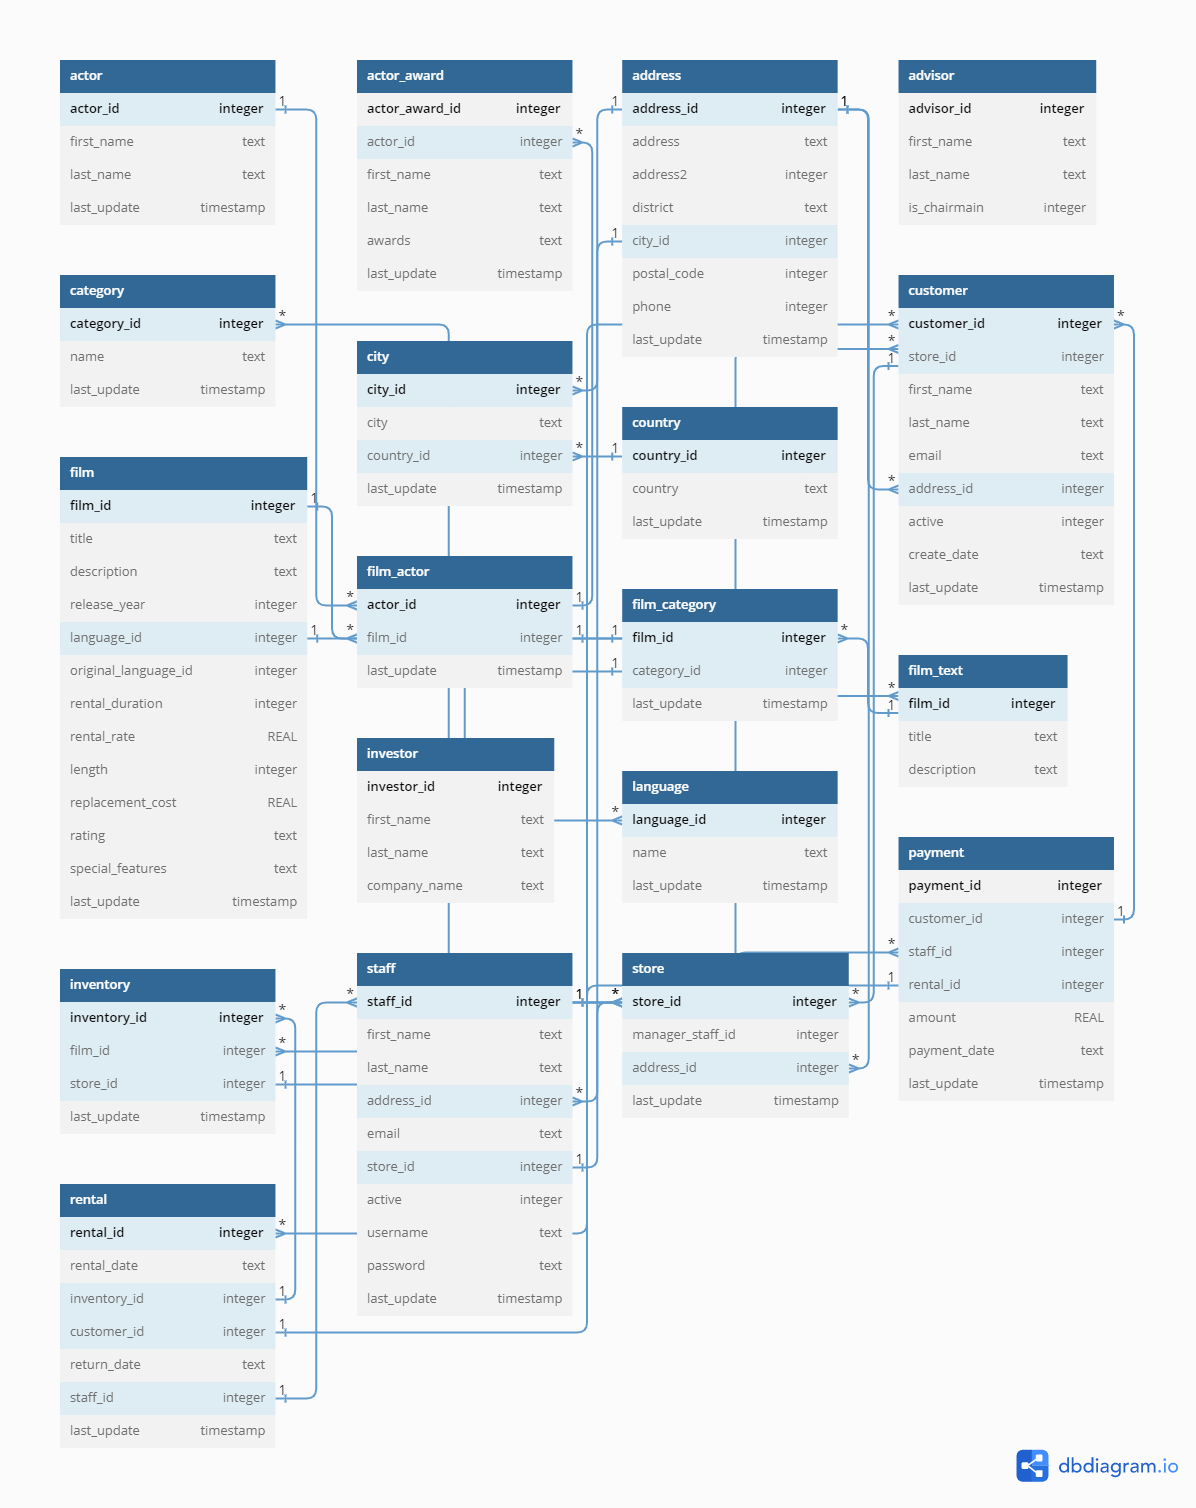

In [1]:
# I will be using sqlite3 library
import pandas as pd
import sqlite3 as sql

In [2]:
# Connecting my database
conn = sql.connect('new.db')

### Question 1

> My partner and I want to come by each of the stores in person and meet the managers. Please send over the managers' names at each store, with the full address of each property (street address, district, city, and country)

### Question 2

> I would like to get a better understanding of all of the inventory that would come along with the business. Please pull together a list of each inventory item you have stocked, including the store_id number, the inventory_id, the name of the film, the film's rating, its rental rate and replacement cost.

In [5]:
query_2 ='''
SELECT f.title,
	   i.store_id,
       i.inventory_id,
       f.rating,
       f.rental_rate,
       f.replacement_cost
FROM film AS f
INNER JOIN inventory AS i
ON f.film_id = i.film_id
'''
#running our query
pd.read_sql_query(query_2, conn)

,title,store_id,inventory_id,rating,rental_rate,replacement_cost
0,ACADEMY DINOSAUR,1,1,PG,0.99,20.99
1,ACADEMY DINOSAUR,1,2,PG,0.99,20.99
2,ACADEMY DINOSAUR,1,3,PG,0.99,20.99
3,ACADEMY DINOSAUR,1,4,PG,0.99,20.99
4,ACADEMY DINOSAUR,2,5,PG,0.99,20.99
...,...,...,...,...,...,...
4576,ZORRO ARK,1,4577,NC-17,4.99,18.99
4577,ZORRO ARK,2,4578,NC-17,4.99,18.99
4578,ZORRO ARK,2,4579,NC-17,4.99,18.99
4579,ZORRO ARK,2,4580,NC-17,4.99,18.99


### Question 3

> From the same list of films you just pulled, please roll that data up and provide a summary level overview of your inventory. We would like to know how many inventory items you have with each rating at each store.

In [6]:
query_3='''
SELECT f.title,
	   i.store_id,
       COUNT(inventory_id) AS inventory_item,
       f.rating
FROM film AS f
INNER JOIN inventory AS i
ON f.film_id = i.film_id
GROUP BY 1
'''
pd.read_sql_query(query_3, conn)

,title,store_id,inventory_item,rating
0,ACADEMY DINOSAUR,1,8,PG
1,ACE GOLDFINGER,2,3,G
2,ADAPTATION HOLES,2,4,NC-17
3,AFFAIR PREJUDICE,1,7,G
4,AFRICAN EGG,2,3,G
...,...,...,...,...
953,YOUNG LANGUAGE,1,2,G
954,YOUTH KICK,1,2,NC-17
955,ZHIVAGO CORE,2,2,NC-17
956,ZOOLANDER FICTION,1,5,R


### Question 4

> Similarly, we want to understand how diversified the inventory is in terms of replacement cost. We want to see how big of a hit it would be if a certain category of film became unpopular at a certain store. We would like to see the number of films, as well as the average replacement cost, and total replacement cost, sliced by store and film category.

In [7]:

query_4 ='''
SELECT fc.category_id,
	   i.store_id,
       COUNT(f.title) AS number_of_films,
       ROUND(AVG(f.replacement_cost), 2) AS average_replacement_cost,
       ROUND(SUM(f.replacement_cost), 2) AS total_replacement_cost
FROM film AS f
INNER JOIN inventory AS i
ON f.film_id = i.film_id
INNER JOIN film_category AS fc
ON f.film_id = fc.film_id
GROUP BY 1, 2
'''
pd.read_sql_query(query_4, conn)

,category_id,store_id,number_of_films,average_replacement_cost,total_replacement_cost
0,1,1,169,21.19,3581.31
1,1,2,143,21.50,3074.57
2,2,1,161,20.39,3282.39
3,2,2,174,20.00,3479.26
4,3,1,129,19.99,2578.71
5,3,2,140,19.50,2730.60
6,4,1,131,20.62,2700.69
7,4,2,139,21.29,2959.61
8,5,1,142,19.44,2760.58
9,5,2,127,18.87,2396.73


### Question 5

> We want to make sure you folks have a good handle on who your customers are. Please provide a list of all customer names, which store they go to, whether or not they are currently active, and their full addresses (street address, city, and country).

In [9]:

query_5 ='''
SELECT c.first_name,
	   c.last_name,
       c.store_id,
       c.active,
       a.address,
       ci.city,
       co.country
FROM customer AS c
INNER JOIN address AS a
USING (address_id)
INNER JOIN city AS ci
USING (city_id)
INNER JOIN country AS co
USING(country_id)
'''
pd.read_sql_query(query_5, conn)

,first_name,last_name,store_id,active,address,city,country
0,MARY,SMITH,1,1,1913 Hanoi Way,Sasebo,Japan
1,PATRICIA,JOHNSON,1,1,1121 Loja Avenue,San Bernardino,United States
2,LINDA,WILLIAMS,1,1,692 Joliet Street,Athenai,Greece
3,BARBARA,JONES,2,1,1566 Inegl Manor,Myingyan,Myanmar
4,ELIZABETH,BROWN,1,1,53 Idfu Parkway,Nantou,Taiwan
...,...,...,...,...,...,...,...
594,TERRENCE,GUNDERSON,1,1,844 Bucuresti Place,Jinzhou,China
595,ENRIQUE,FORSYTHE,1,1,1101 Bucuresti Boulevard,Patras,Greece
596,FREDDIE,DUGGAN,1,1,1103 Quilmes Boulevard,Sullana,Peru
597,WADE,DELVALLE,1,1,1331 Usak Boulevard,Lausanne,Switzerland


### Question 6

> We would like to understand how much your customers are spending with you, and also to know who your most valuable customers are. Please pull together a list of customer names, their total lifetime rentals, and the sum of all payments you have collected from them. It would be great to see this ordered on total lifetime value, with the most valuable customers at the top of the list.

In [10]:

query_6='''
SELECT c.first_name,
	   c.last_name,
       COUNT(r.rental_id) AS total_lifetime_rentals,
       ROUND(SUM(p.amount),2) AS total_lifetime_payment
FROM customer AS c
INNER JOIN rental AS r
USING (customer_id)
INNER JOIN payment AS p
USING (customer_id)
GROUP BY 1, 2
ORDER BY 4 DESC
'''
pd.read_sql_query(query_6, conn)

,first_name,last_name,total_lifetime_rentals,total_lifetime_payment
0,KARL,SEAL,2025,9969.75
1,ELEANOR,HUNT,2116,9960.84
2,CLARA,SHAW,1764,8214.36
3,MARION,SNYDER,1521,7589.79
4,RHONDA,KENNEDY,1521,7589.79
...,...,...,...,...
594,TIFFANY,JORDAN,196,838.04
595,KATHERINE,RIVERA,196,824.04
596,CAROLINE,BOWMAN,225,762.75
597,LEONA,OBRIEN,196,712.04


### Question 7

>  My partner and I would like to get to know your board of advisors and any current investors. Could you please provide a list of advisor and investor names in one table? Could you please note whether they are an investor or an advisor, and for the investors, it would be good to include which company they work with. 

### Question 8

>  We're interested in how well you have covered the most-awarded actors. Of all the actors with three types of awards, for what % of them do we carry a film? And how about for actors with two types of awards? Same questions. Finally, how about actors with just one award?